# ADY201m _ Lab1 _ Weather Dataset _ LaiLeDinhDuc

The link where I got the dataset: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

<div style="background: linear-gradient(to right, #ff7e5f, #feb47b); height: 30px; width: 100%;"></div>


# 1. Set up and dowload dataset via Kaggle API

In [4]:
import os
import zipfile
import sys
print(sys.executable)

C:\Users\LAILE\anaconda3\python.exe


In [5]:
# I've uploaded my Kaggle API token by placing "kaggle.json" in "C:\Users\LAILE\.kaggle"
!pip install kaggle

In [6]:
!kaggle datasets download -d emmanuelfwerr/london-weather-data

Dataset URL: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data
License(s): CC0-1.0




  0%|          | 0.00/226k [00:00<?, ?B/s]
100%|##########| 226k/226k [00:00<00:00, 366kB/s]
100%|##########| 226k/226k [00:00<00:00, 365kB/s]


In [7]:
with zipfile.ZipFile("london-weather-data.zip", 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

# 2. Data Collection, Understanding, Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load CSV file
weather_data = pd.read_csv('london_weather.csv')

1. **date** - recorded date of measurement - **(int)**
2. **cloud_cover** - cloud cover measurement in oktas - **(float)**
3. **sunshine** - sunshine measurement in hours (hrs) - **(float)**
4. **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - **(float)**
5. **max_temp** - maximum temperature recorded in degrees Celsius (°C) - **(float)**
6. **mean_temp** - mean temperature in degrees Celsius (°C) - **(float)**
7. **min_temp** - minimum temperature recorded in degrees Celsius (°C) - **(float)**
8. **precipitation** - precipitation measurement in millimeters (mm) - **(float)**
9. **pressure** - pressure measurement in Pascals (Pa) - **(float)**
10. **snow_depth** - snow depth measurement in centimeters (cm) - **(float)**

In [6]:
# Get an over view
weather_data.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
weather_data.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### Data Cleaning

In [10]:
weather_data.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [12]:
weather_data.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [13]:
weather_data.dropna(axis=0, inplace=True)
weather_data.reset_index(drop=True, inplace=True)

In [14]:
weather_data.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [15]:
# Convert date column to datetime datatype
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y%m%d')
weather_data.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [16]:
data = weather_data.groupby(weather_data['date'].dt.month)['mean_temp'].mean()

In [17]:
# Data After Cleaning
weather_data

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
13838,2019-12-27,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
13839,2019-12-28,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
13840,2019-12-29,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
13841,2019-12-30,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


In [18]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13843 non-null  datetime64[ns]
 1   cloud_cover       13843 non-null  float64       
 2   sunshine          13843 non-null  float64       
 3   global_radiation  13843 non-null  float64       
 4   max_temp          13843 non-null  float64       
 5   mean_temp         13843 non-null  float64       
 6   min_temp          13843 non-null  float64       
 7   precipitation     13843 non-null  float64       
 8   pressure          13843 non-null  float64       
 9   snow_depth        13843 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.1 MB


# 3. Data Analysis

In [20]:
weather_data.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,13843,13843.00000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,1998-10-04 18:23:47.725204096,5.32818,4.262609,114.529148,14.951911,11.085408,7.212302,1.667493,101538.493101,0.037853
min,1979-01-01 00:00:00,0.00000,0.000000,12.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1988-07-06 12:00:00,4.00000,0.400000,39.000000,10.200000,6.800000,3.200000,0.000000,100900.000000,0.000000
50%,1998-01-10 00:00:00,6.00000,3.400000,89.000000,14.400000,10.800000,7.300000,0.000000,101630.000000,0.000000
75%,2009-01-01 12:00:00,7.00000,7.100000,180.000000,19.700000,15.550000,11.400000,1.600000,102260.000000,0.000000
max,2019-12-31 00:00:00,9.00000,15.700000,352.000000,37.900000,29.000000,22.300000,61.800000,104430.000000,22.000000
std,NaN,2.03417,3.987488,87.758136,6.510220,5.700936,5.319409,3.733947,1066.084413,0.545712


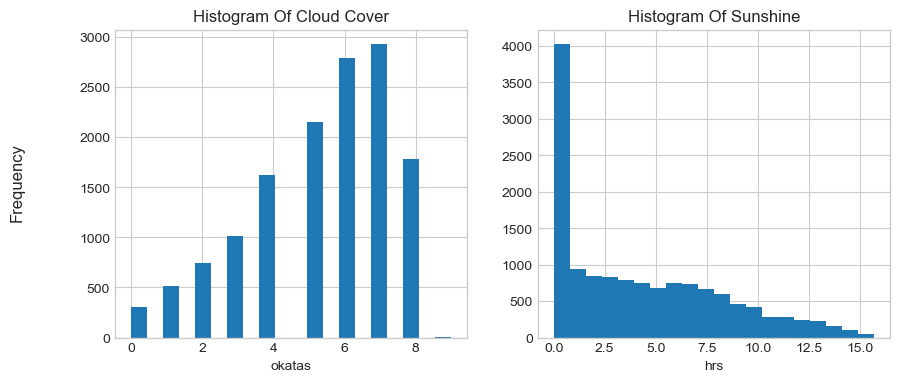

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig1.supylabel('Frequency')

ax1[0].hist(weather_data['cloud_cover'], bins=20)
ax1[0].set_xlabel('okatas')
ax1[0].set_title('Histogram Of Cloud Cover')

ax1[1].hist(weather_data['sunshine'], bins=20)
ax1[1].set_xlabel('hrs')
ax1[1].set_title('Histogram Of Sunshine');

# 0 okta: Bầu trời không có mây, hoàn toàn quang đãng.
# 1 okta: Bầu trời có một ít mây (1/8 bầu trời bị che).
# 4 oktas: Một nửa bầu trời bị mây che.
# 8 oktas: Bầu trời hoàn toàn bị mây che phủ.

## Quan sát thấy được có một thành phần bất thường nằm lớn hơn 8

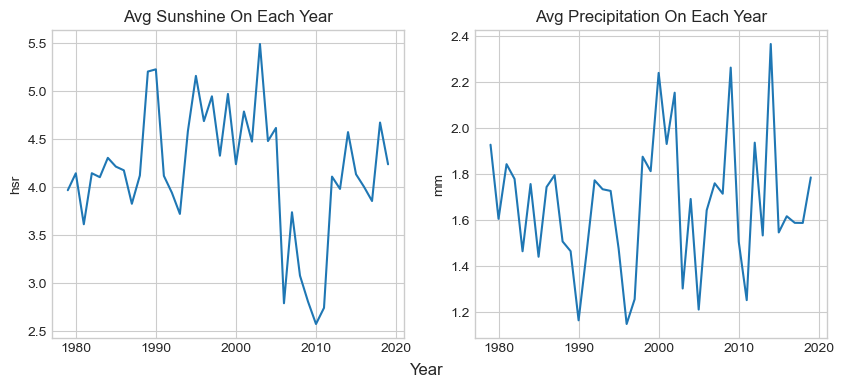

In [22]:
data_onyear = weather_data.copy()
data_onyear['date'] = data_onyear['date'].dt.year
total_sunshine = data_onyear.groupby('date')['sunshine'].mean()
total_precipitation = data_onyear.groupby('date')['precipitation'].mean()

# Plot data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.supxlabel('Year')

ax[0].plot(np.arange(1979, 2020, 1), total_sunshine)
ax[0].set_title('Avg Sunshine On Each Year')
ax[0].set_ylabel('hsr')

ax[1].plot(np.arange(1979, 2020, 1), total_precipitation)
ax[1].set_title('Avg Precipitation On Each Year')
ax[1].set_ylabel('mm')

plt.tight_layout;

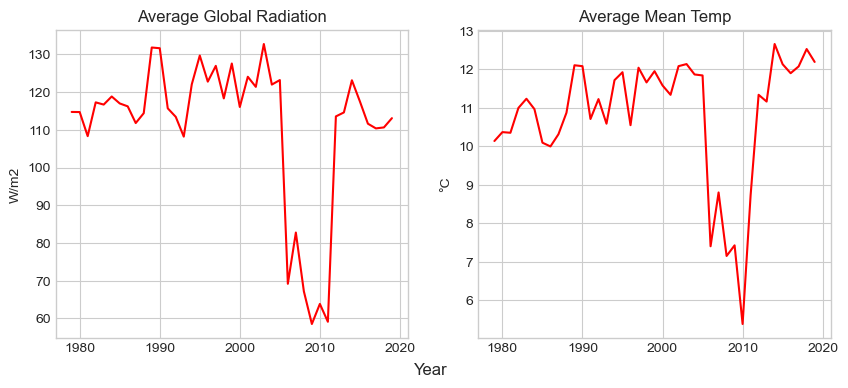

In [23]:
total_global_radiation = data_onyear.groupby('date')['global_radiation'].mean()
total_mean_temp = data_onyear.groupby('date')['mean_temp'].mean()

# # Plot data
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig2.supxlabel('Year')

ax2[0].plot(np.arange(1979, 2020, 1), total_global_radiation, c='red')
ax2[0].set_title('Average Global Radiation')
ax2[0].set_ylabel('W/m2')

ax2[1].plot(np.arange(1979, 2020, 1), total_mean_temp, c='red')
ax2[1].set_title('Average Mean Temp')
ax2[1].set_ylabel('°C')

plt.tight_layout;

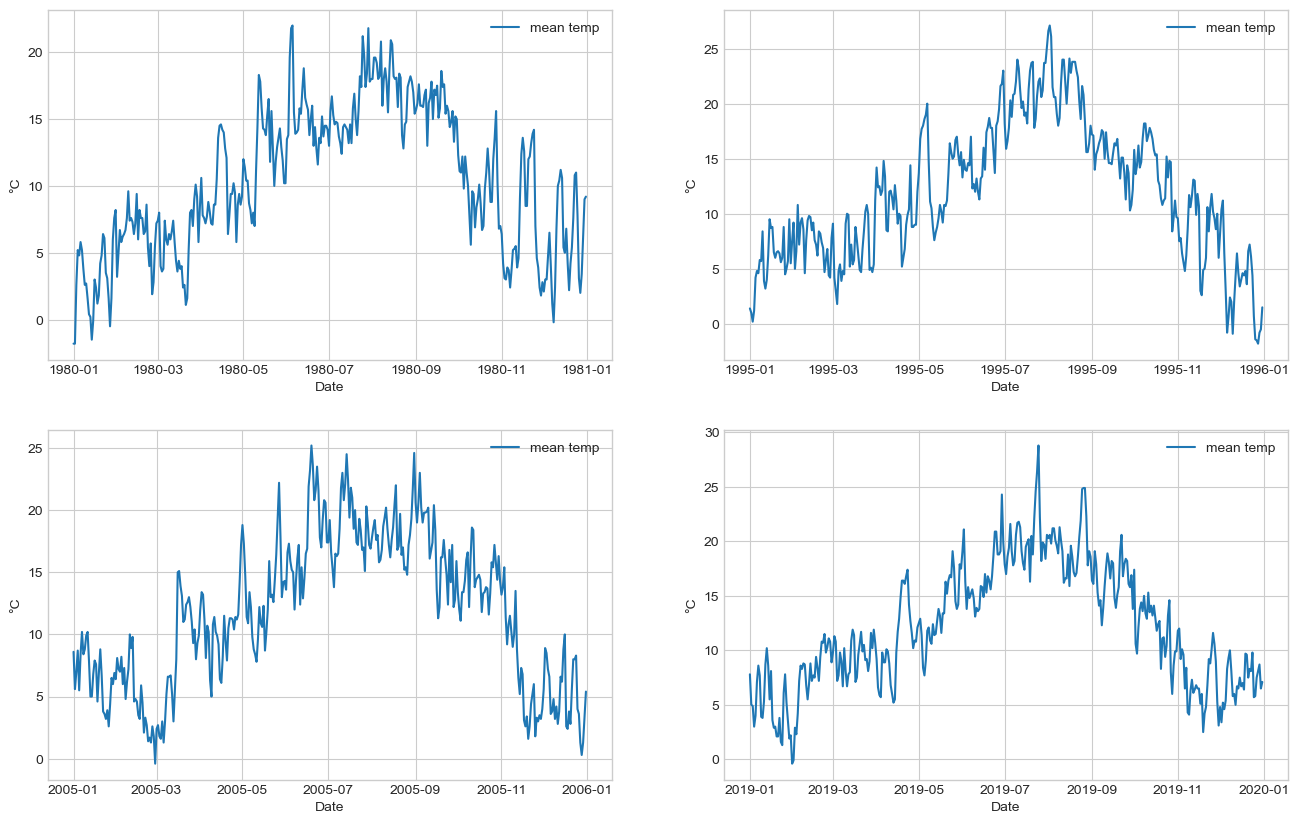

In [24]:
# I'll pick 4 years to observe the change of mean temp over the period from 1980 to 2020.
temp_1980 = weather_data.loc[weather_data.date.dt.year == 1980]
temp_1995 = weather_data.loc[weather_data.date.dt.year == 1995]
temp_2005 = weather_data.loc[weather_data.date.dt.year == 2005]
temp_2019 = weather_data.loc[weather_data.date.dt.year == 2019]

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize = (16, 10))
pairs = [(ax_1,1980), (ax_2,1995), (ax_3,2005), (ax_4,2019)]

for ax, year in pairs:
    data = weather_data.loc[weather_data.date.dt.year == year]
    ax.plot(data['date'], data['mean_temp'], label='mean temp')
    ax.set_xlabel('Date')
    ax.set_ylabel('°C')
    ax.legend();

The mean temp gradually increase.

### Feature Engineering

In [27]:
# Visualize Correlation Matrix And Plot Each Pair Of Feature
corr_matrix = weather_data.corr()
corr_matrix

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,1.000000,-0.094442,-0.013696,-0.046502,0.037487,0.045250,0.049355,0.008258,-0.010942,-0.044466
cloud_cover,-0.094442,1.000000,-0.734598,-0.466202,-0.184016,-0.084180,0.071692,0.229224,-0.237053,-0.001365
sunshine,-0.013696,-0.734598,1.000000,0.851249,0.468120,0.397064,0.222065,-0.226453,0.219350,-0.033778
global_radiation,-0.046502,-0.466202,0.851249,1.000000,0.687035,0.635150,0.479892,-0.157646,0.144784,-0.061488
max_temp,0.037487,-0.184016,0.468120,0.687035,1.000000,0.907365,0.806246,-0.067437,0.099683,-0.130107
mean_temp,0.045250,-0.084180,0.397064,0.635150,0.907365,1.000000,0.955716,-0.007041,0.004609,-0.154469
min_temp,0.049355,0.071692,0.222065,0.479892,0.806246,0.955716,1.000000,0.037195,-0.070920,-0.157537
precipitation,0.008258,0.229224,-0.226453,-0.157646,-0.067437,-0.007041,0.037195,1.000000,-0.347647,-0.002357
pressure,-0.010942,-0.237053,0.219350,0.144784,0.099683,0.004609,-0.070920,-0.347647,1.000000,-0.020581
snow_depth,-0.044466,-0.001365,-0.033778,-0.061488,-0.130107,-0.154469,-0.157537,-0.002357,-0.020581,1.000000


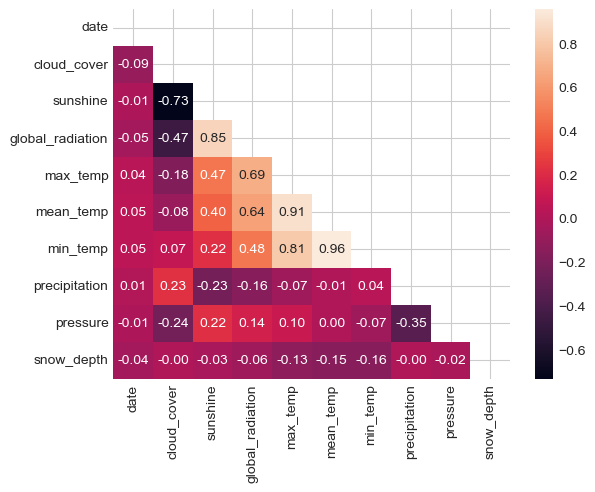

In [28]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,annot=True, fmt='.2f', mask=mask);

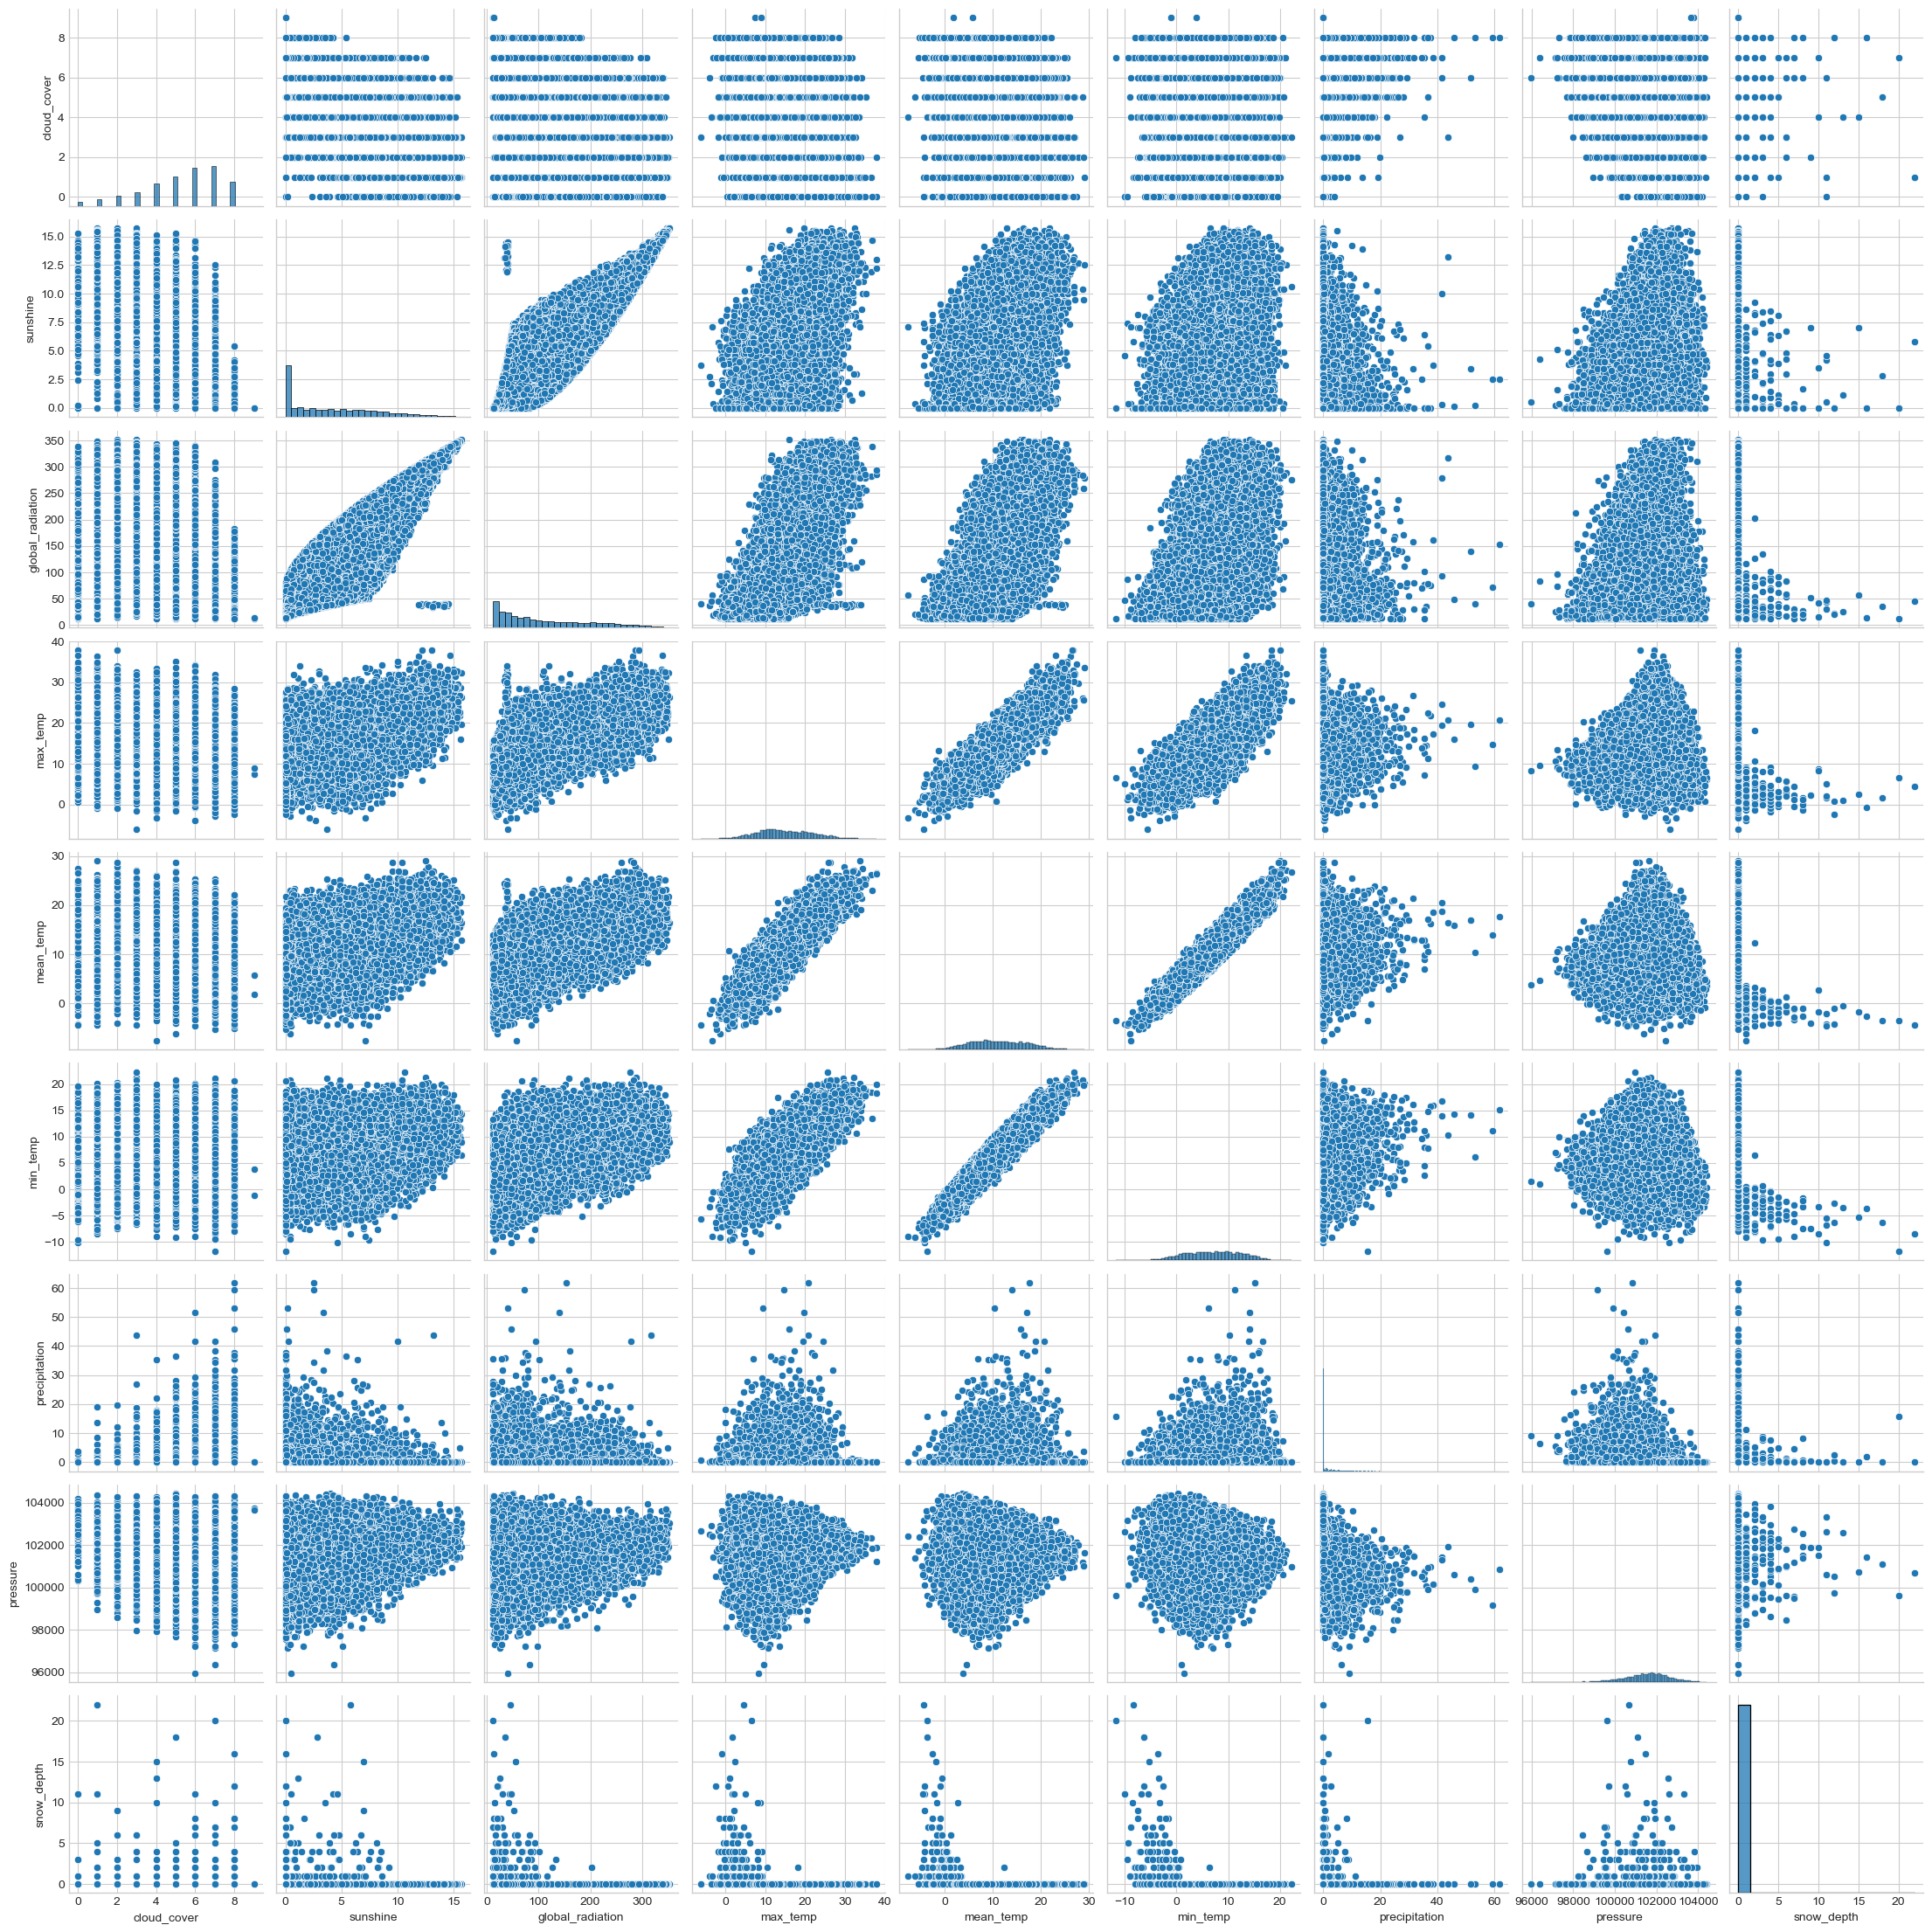

In [29]:
sns.pairplot(weather_data);

We can observe that globlal radiation and sunshine are correlated well with other feature.   
--> One of them is an appropriate target column.
I decide to choose [sunshine] as the target column.

In [31]:
corr_matrix['sunshine']

date               -0.013696
cloud_cover        -0.734598
sunshine            1.000000
global_radiation    0.851249
max_temp            0.468120
mean_temp           0.397064
min_temp            0.222065
precipitation      -0.226453
pressure            0.219350
snow_depth         -0.033778
Name: sunshine, dtype: float64

In [32]:
# Remove [date] feature having nearly zero correlation.
# Target Column: sunshine
# Features: clould_cover, golobal_radiation, max_temp, min_temp, percipitation, pressure, snow_depth
weather_data = weather_data.iloc[:,1:]
weather_data

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
13838,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
13839,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
13840,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
13841,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


# 4. Regression Analysis

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X = weather_data[['cloud_cover', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']]
Y = weather_data['sunshine']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
model = RandomForestRegressor(n_estimators=100).fit(X_train, Y_train)
predictions = model.predict(X_test)

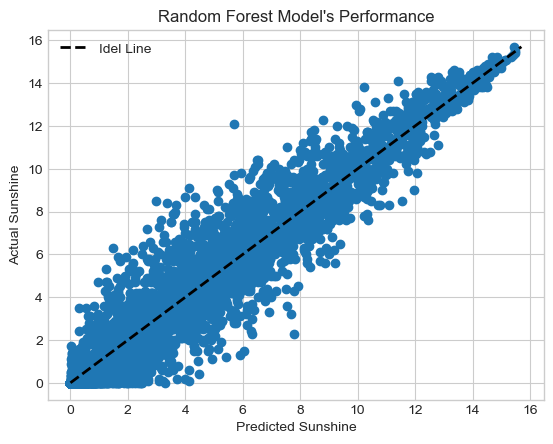

In [37]:
plt.scatter(predictions, Y_test)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Idel Line')
plt.title("Random Forest Model's Performance")
plt.xlabel("Predicted Sunshine")
plt.ylabel("Actual Sunshine")
plt.legend();

In [38]:
import sklearn.metrics as sm
print("Mean Squared Error:", round(sm.mean_squared_error(Y_test, predictions),5))
print("Median absolute error =", round(sm.median_absolute_error(Y_test, predictions), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, predictions), 2)) 

Mean Squared Error: 1.38901
Median absolute error = 0.55
Mean absolute error = 0.81
